<a href="https://colab.research.google.com/github/nomeomitido/-joaoruyfaustino--DataScience-GenAI-Submissions/blob/main/classtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis and Data Preparation

**Using Salary Data**

- Clear up the dataset by removing unnecessary values and checking for missing ones
- Check for correlation between different categories in order to evaluate the predictive value of data (e.g. 'Is salary directly correlated to experience level?')
- Prepare data in order to facilitate the production of ML models

In [ ]:
from google.colab import files
upload = files.upload()

Saving EDA-DP.csv to EDA-DP (1).csv


In [ ]:
#creating dataframe
import pandas as pd

df = pd.read_csv('/content/EDA-DP.csv')
display(df.head())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [ ]:
#checking for missing values
print('Missing values in each column:')
display(df.isnull().sum())

Missing values in each column:


,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [ ]:
#removing the 'salary' column, as salary figures should be in a common currency (in this case USD)
df = df.drop(columns=['salary'])
print("The 'salary' column has been successfully dropped from the DataFrame.")
display(df.head())

The 'salary' column has been successfully dropped from the DataFrame.


,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,USD,190000,US,0,US,M


In [ ]:
#remove 'job_title' column from dataframe (no predictive value as all jobs are f/same sector)
import pandas as pd

df = pd.read_csv('/content/EDA-DP.csv') # Load the DataFrame
df = df.drop(columns=['salary']) # Re-apply 'salary' column drop
df['salary_currency'] = df['salary_currency'].apply(lambda x: 0 if x == 'USD' else 1) # Re-apply currency conversion

df = df.drop(columns=['job_title'])
print("The 'job_title' column has been successfully dropped from the DataFrame.")
display(df.head())

The 'job_title' column has been successfully dropped from the DataFrame.


,work_year,experience_level,employment_type,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,0,202730,US,0,US,M
1,2024,SE,FT,0,92118,US,0,US,M
2,2024,SE,FT,0,130500,US,0,US,M
3,2024,SE,FT,0,96000,US,0,US,M
4,2024,SE,FT,0,190000,US,0,US,M


In [ ]:
# convert 'salary_currency' column into a binary where all values expressing 'USD' are '0' and all other values are expressed as '1'
df['salary_currency'] = df['salary_currency'].apply(lambda x: 0 if x == 'USD' else 1)
print("The 'salary_currency' column has been converted to binary (0 for USD, 1 for other currencies).")
display(df.head())

The 'salary_currency' column has been converted to binary (0 for USD, 1 for other currencies).


,work_year,experience_level,employment_type,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,0,202730,US,0,US,M
1,2024,SE,FT,0,92118,US,0,US,M
2,2024,SE,FT,0,130500,US,0,US,M
3,2024,SE,FT,0,96000,US,0,US,M
4,2024,SE,FT,0,190000,US,0,US,M


In [ ]:
#convert 'company_location' into a binary where all values expressing 'US' are '0' and others are represented by'1'
df['company_location'] = df['company_location'].apply(lambda x: 0 if x == 'US' else 1)
print("The 'company_location' column has been converted to binary (0 for US, 1 for other countries).")
display(df.head())

The 'company_location' column has been converted to binary (0 for US, 1 for other countries).


,work_year,experience_level,employment_type,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,0,202730,US,0,0,M
1,2024,SE,FT,0,92118,US,0,0,M
2,2024,SE,FT,0,130500,US,0,0,M
3,2024,SE,FT,0,96000,US,0,0,M
4,2024,SE,FT,0,190000,US,0,0,M


In [ ]:
#removing rows which express Part Time (PT) and Contract (CT) values as they're not statistically significant
import pandas as pd

df = pd.read_csv('/content/EDA-DP.csv') # Load the DataFrame
df = df.drop(columns=['salary']) # Re-apply 'salary' column drop
df = df.drop(columns=['job_title']) # Re-apply 'job_title' column drop
df['salary_currency'] = df['salary_currency'].apply(lambda x: 0 if x == 'USD' else 1) # Re-apply currency conversion

# Remove rows where 'employment_type' is 'CT' or 'FL'
df = df[~df['employment_type'].isin(['CT', 'FL'])]

print("Rows with 'employment_type' as 'CT' or 'FL' have been removed.")
display(df.head())

Rows with 'employment_type' as 'CT' or 'FL' have been removed.


,work_year,experience_level,employment_type,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,0,202730,US,0,US,M
1,2024,SE,FT,0,92118,US,0,US,M
2,2024,SE,FT,0,130500,US,0,US,M
3,2024,SE,FT,0,96000,US,0,US,M
4,2024,SE,FT,0,190000,US,0,US,M


In [ ]:
import pandas as pd

df = pd.read_csv('/content/EDA-DP.csv') # Load the DataFrame
df = df.drop(columns=['salary']) # Re-apply 'salary' column drop
df = df.drop(columns=['job_title']) # Re-apply 'job_title' column drop
df['salary_currency'] = df['salary_currency'].apply(lambda x: 0 if x == 'USD' else 1) # Re-apply currency conversion

# Remove rows where 'employment_type' is 'CT' or 'FL'
df = df[~df['employment_type'].isin(['CT', 'FL'])]

# Drop the 'work_year' column
df = df.drop(columns=['work_year'])

print("Rows with 'employment_type' as 'CT' or 'FL' have been removed and 'work_year' column has been dropped.")
display(df.head())

Rows with 'employment_type' as 'CT' or 'FL' have been removed and 'work_year' column has been dropped.


,experience_level,employment_type,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,SE,FT,0,202730,US,0,US,M
1,SE,FT,0,92118,US,0,US,M
2,SE,FT,0,130500,US,0,US,M
3,SE,FT,0,96000,US,0,US,M
4,SE,FT,0,190000,US,0,US,M


Notes

In [ ]:
import pandas as pd

df = pd.read_csv('/content/EDA-DP.csv') # Load the DataFrame
df = df.drop(columns=['salary']) # Re-apply 'salary' column drop
df = df.drop(columns=['job_title']) # Re-apply 'job_title' column drop
df['salary_currency'] = df['salary_currency'].apply(lambda x: 0 if x == 'USD' else 1) # Re-apply currency conversion

print("Distribution of 'work_year' column:")
display(df['work_year'].value_counts())

Distribution of 'work_year' column:


,count
work_year,
2023,8519
2024,6067
2022,1655
2021,218
2020,75


In [ ]:
#what is the distribution of experience level?
print("Distribution of 'experience_level' column:")
display(df['experience_level'].value_counts())

Distribution of 'experience_level' column:


,count
experience_level,
SE,10670
MI,4038
EN,1325
EX,501


In [ ]:
#what is the distribution of employment type?
print("Distribution of 'employment_type' column:")
display(df['employment_type'].value_counts())

Distribution of 'employment_type' column:


,count
employment_type,
FT,16454
PT,38
CT,28
FL,14


In [ ]:
#what is the distribution of salary currency?
print("Distribution of 'salary_currency' column:")
display(df['salary_currency'].value_counts())

Distribution of 'salary_currency' column:


,count
salary_currency,
USD,15294
GBP,616
EUR,449
CAD,56
INR,55
AUD,12
CHF,8
PLN,7
SGD,6


In [ ]:
#what is the distribution of company location?
print("Distribution of 'company_location' column:")
display(df['company_location'].value_counts())

Distribution of 'company_location' column:


,count
company_location,
US,14518
GB,694
CA,455
ES,133
DE,105
...,...
DZ,1
IQ,1
CN,1


Testing correlation

In [ ]:
#trying to figure out how many people work in a country different from their company
print("Correlation between 'company_location' and 'employee_residence':")
crosstab_df = pd.crosstab(df['company_location'], df['employee_residence'])
display(crosstab_df.head(10))

Correlation between 'company_location' and 'employee_residence':


employee_residence,AD,AE,AM,AR,AS,AT,AU,BA,BE,BG,...,SI,TH,TN,TR,UA,UG,US,UZ,VN,ZA
company_location,,,,,,,,,,,,,,,,,,,,,
AD,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AE,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AM,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AR,0,0,0,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AT,0,0,0,0,0,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AU,0,0,0,0,0,0,52,0,0,0,...,0,0,0,0,0,0,1,0,0,0
BA,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
BE,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0


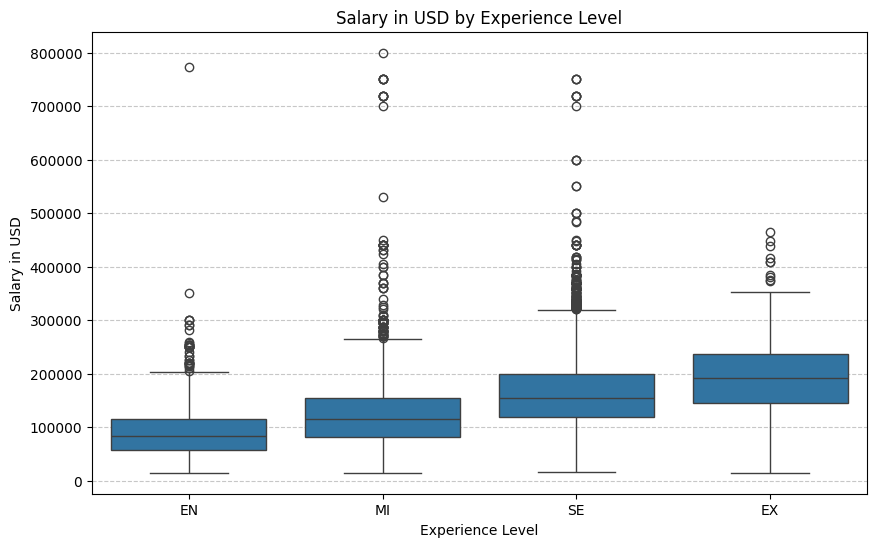

In [ ]:
#correlation between Experience Level and Salary in USD
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=['EN', 'MI', 'SE', 'EX'])
plt.title('Salary in USD by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
display(df.groupby('employment_type')['salary_in_usd'].mean())

,salary_in_usd
employment_type,
FT,149987.686520
PT,83750.157895


In [ ]:
display(df.groupby('remote_ratio')['salary_in_usd'].mean())

,salary_in_usd
remote_ratio,
0,153193.512784
50,83393.514403
100,145719.069442


In [ ]:
print("Average 'salary_in_usd' by 'company_size':")
display(df.groupby('company_size')['salary_in_usd'].mean())

Average 'salary_in_usd' by 'company_size':


,salary_in_usd
company_size,
L,141216.331395
M,151127.048600
S,86711.203488
